In [4]:
import ClassificationTest
ClassificationTest = reload(ClassificationTest)
import parse_lipidblast as pl
import ml

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

import numpy as np

In [2]:
fp = open("combined.txt")
compounds = pl.parse_all(fp.read(), sep='\n')
p = pl.unique_peaks(compounds)

In [5]:
# add or remove save parameter to load from that file on construction 
# and save to it after adding tests/ running a test (called after every single test)
T = ClassificationTest.ClassificationTest(compounds=None, save='results/classifiers_no_noise.pickle')

Loading tests and results from disk
Fix: Converting from pickle to npz, hang on... ( .pickle can be deleted afterwards)


In [5]:
# remove tests from storage as needed
#T.clear()
#T.clear_results()
#T.remove_test(slice(0,3))
#T.remove_test(25)


In [15]:
from sklearn import svm, tree, naive_bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


nb = naive_bayes.BernoulliNB(alpha = 0.017)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
svm = svm.SVC()

In [10]:
T.clear()
# add some tests (do NOT execute this when you have already loaded the files via the pickle file during construction)
for decimal in [None, 3,1,0]:
    for peak_noise in [0, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1]:
        for add_random_peaks in [0, 1, 3, 5]:
            T.add_test(nb, n_folds=10, noise={"add_random_peaks":add_random_peaks, "peak_position":peak_noise}, 
                       transformation={"round":decimal}, save_immediately=False)
            
# add some extremes
for peak_noise in [0.002, 0.008, 0.012, 0.04, 0.08, 0.16, 0.4, 1, 2, 5, 10]:
    for decimal in [None, 3, 2, 0, -1]:
        T.add_test(nb, n_folds=10, noise={"peak_position":peak_noise}, 
                       transformation={"round":decimal}, save_immediately=False)
        
for add_random_peaks in [0, 5, 10, 20]:
    T.add_test(nb, n_folds=10, noise={"add_random_peaks":add_random_peaks, "peak_position":0.002}, 
                       transformation={"round":3}, save_immediately=False)
        
# add noise dependencies of other classifiers
for classifier in [et, rf]:
    for add_random_peaks in [0,2]:
        for peak_noise in [0.001, 0.003, 0.01, 0.03]:
            T.add_test(classifier, noise={"add_random_peaks":add_random_peaks,"peak_position":peak_noise}, 
                           transformation={"round":3}, save_immediately=False)
for classifier in [et, rf]:
      add_random_peaks = 5
      for peak_noise in [0.003, 0.01]:
            T.add_test(classifier, noise={"add_random_peaks":add_random_peaks,peak_position":peak_noise}, 
                           transformation={"round":3}, save_immediately=False)

# since saving was postponed to avoid having rewrite the pickle file after every add_test, save now
T.save_state()


In [20]:
T.clear()
# add noise dependencies of other classifiers
for classifier in [et, rf]:
    for add_random_peaks in [0,2]:
        for peak_noise in [0.001, 0.003, 0.01, 0.03]:
            T.add_test(classifier, noise={"add_random_peaks":add_random_peaks,"peak_position":peak_noise}, 
                           transformation={"round":3}, save_immediately=False)

for classifier in [et, rf]:
    add_random_peaks = 5
    for peak_noise in [0.003, 0.01]:
            T.add_test(classifier, noise={"add_random_peaks":add_random_peaks,"peak_position":peak_noise}, 
                           transformation={"round":3}, save_immediately=False)

# since saving was postponed to avoid having rewrite the pickle file after every add_test, save now
T.save_state()

In [21]:
# print any portion of the result table
T.print_result_table(which=slice(0,None))

  #  Classifier              noise         feature transformation      folds  t/fold [s]    correct    sigma
---  ----------------------  ------------  ------------------------  -------  ------------  ---------  -------
  0  ExtraTreesClassifier    1.00e-03 / 0  {'round': 3}                  0.2  pending       pending    pending
  1  ExtraTreesClassifier    3.00e-03 / 0  {'round': 3}                  0.2  pending       pending    pending
  2  ExtraTreesClassifier    1.00e-02 / 0  {'round': 3}                  0.2  pending       pending    pending
  3  ExtraTreesClassifier    3.00e-02 / 0  {'round': 3}                  0.2  pending       pending    pending
  4  ExtraTreesClassifier    1.00e-03 / 2  {'round': 3}                  0.2  pending       pending    pending
  5  ExtraTreesClassifier    3.00e-03 / 2  {'round': 3}                  0.2  pending       pending    pending
  6  ExtraTreesClassifier    1.00e-02 / 2  {'round': 3}                  0.2  pending       pending    pending
  7

In [8]:
# other tests to try
#T.add_test(nb,  n_folds=3)
#T.add_test(nb, noise={"add_random_peaks": 15})
#T.add_test(nb, transformation={"dim_reduction":"LowVariance", "threshold":0.0008})
#T.add_test(nb, transformation={'round', 4})

Running test 1/20: Classifier ExtraTreesClassifier with test size of 0.2, feature selection 'absolute' and gaussian noise on peaks (sigma=0.001) and transformation {'round': 3}
Regenerating feature space absolute with noise {'peak_position': 0.001} and transformation {'round': 3}
Adding noise {'peak_position': 0.001} and transformation {'round': 3} to the feature space
Feature space generated in 72.6930000782 seconds
fit predict 
saving tests and results to disk


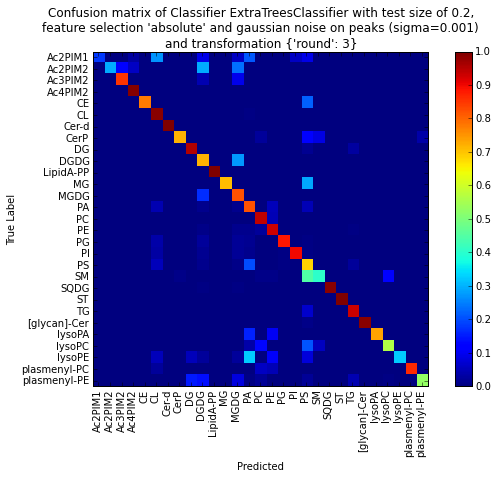


  #  Classifier            noise         feature transformation      folds    t/fold [s]    correct    sigma
---  --------------------  ------------  ------------------------  -------  ------------  ---------  -------
  0  ExtraTreesClassifier  1.00e-03 / 0  {'round': 3}                  0.2        828.85      90.31        0


Running test 2/20: Classifier ExtraTreesClassifier with test size of 0.2, feature selection 'absolute' and gaussian noise on peaks (sigma=0.003) and transformation {'round': 3}
Regenerating feature space absolute with noise {'peak_position': 0.003} and transformation {'round': 3}
Adding noise {'peak_position': 0.003} and transformation {'round': 3} to the feature space
Feature space generated in 74.0260000229 seconds
fit predict 
saving tests and results to disk


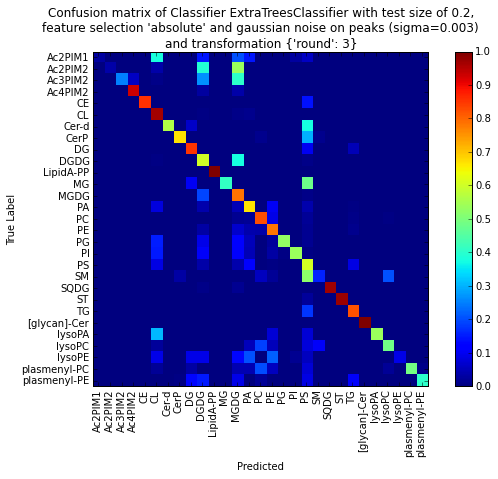


  #  Classifier            noise         feature transformation      folds    t/fold [s]    correct    sigma
---  --------------------  ------------  ------------------------  -------  ------------  ---------  -------
  1  ExtraTreesClassifier  3.00e-03 / 0  {'round': 3}                  0.2        2355.7      81.43        0


Running test 3/20: Classifier ExtraTreesClassifier with test size of 0.2, feature selection 'absolute' and gaussian noise on peaks (sigma=0.01) and transformation {'round': 3}
Regenerating feature space absolute with noise {'peak_position': 0.01} and transformation {'round': 3}
Adding noise {'peak_position': 0.01} and transformation {'round': 3} to the feature space
Feature space generated in 75.4830000401 seconds
fit predict 
saving tests and results to disk


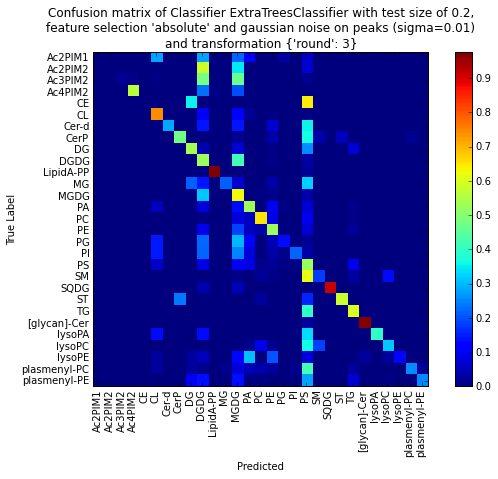


  #  Classifier            noise         feature transformation      folds    t/fold [s]    correct    sigma
---  --------------------  ------------  ------------------------  -------  ------------  ---------  -------
  2  ExtraTreesClassifier  1.00e-02 / 0  {'round': 3}                  0.2       7215.77      62.11        0


Running test 4/20: Classifier ExtraTreesClassifier with test size of 0.2, feature selection 'absolute' and gaussian noise on peaks (sigma=0.03) and transformation {'round': 3}
Regenerating feature space absolute with noise {'peak_position': 0.03} and transformation {'round': 3}
Adding noise {'peak_position': 0.03} and transformation {'round': 3} to the feature space
Feature space generated in 78.4309999943 seconds
fit

In [ ]:
# change output_confusion to print confusion matrix after every test
# change cancel_on_error to display detailed error information if a test fails
# change use_cache to redo a classification already performed in this session
T.run(use_cache=True, cancel_on_error = False, output_confusion=True, output_skipped=False, intermediate_result=True)

In [ ]:
# send test email after completion
import smtplib

f = open('credentials', 'r')
user = f.readline().rstrip()
pw = f.readline().rstrip()
f.close()


msg = "\r\n".join([
  "From:"+user,
  "To:"+user,
  "Subject: ClassificationTest: Tests were completed",
  "",
  T.result_table()
  ])

server = smtplib.SMTP('smtp.gmail.com:587')
server.ehlo()
server.starttls()
server.login(user, pw)

server.sendmail(user, user, msg)